In [1]:
#Importing all the libraries we need

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
#Importing the dataset

features = pd.read_csv('C:\\Users\\Bhagwan\\Downloads\\DS Test\\Training/X_train.csv')
target = pd.read_csv('C:\\Users\\Bhagwan\\Downloads\\DS Test\\Training/y_train.csv')

In [3]:
#displaying independent variables
features

,Unique_ID,C1,C2,C3,C4,C5,C6,C7,C8,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N10.1,N11,N12,N14,N15,N16,N17,N18,N19,N20,N21,N22,N23,N24,N25,N26,N27,N28,N29,N30,N31,N32,N33,N34,N35
0,Candidate_5926,1,0,11,31,0,False,0,True,23.75,NaN,2.5,NaN,NaN,2.595,10.0,0,0,2.0,14.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.816,1750.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.00,113.39,12.0
1,Candidate_48134,1,4,2,66,2,False,1,True,11.05,22.0,3.7,16.0,12.0,3.795,19.0,4,72,0.0,5.0,9.0,0.0,0.0,0.0,0.0,1944.0,0.06,25856.0,17.0,0.88,1.0,40.000,10833.333330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160.00,262.10,17.0
2,Candidate_51717,1,0,19,2,0,False,0,True,29.00,NaN,2.4,NaN,NaN,2.495,17.0,2,15,7.0,3.0,19.0,NaN,10.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.000,6250.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.00,50.29,18.0
3,Candidate_26401,1,1,16,47,1,False,4,True,17.99,1.0,3.5,4.0,4.0,3.595,6.0,5,190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8244.0,0.89,1006.0,6.0,1.00,0.0,26.000,2413.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.00,126.52,27.0
4,Candidate_34872,1,1,13,1,1,True,6,True,27.50,206.0,3.8,11.0,11.0,3.895,31.0,10,1504,0.0,1.0,4.0,0.0,0.0,0.0,0.0,57532.0,0.97,3398.0,31.0,0.96,0.0,44.000,7666.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00,205.47,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33045,Candidate_26099,1,1,14,41,2,False,6,True,15.50,19.0,3.1,7.0,6.0,3.195,7.0,6,303,0.0,0.0,8.0,0.0,0.0,0.0,0.0,16762.0,0.68,7661.0,7.0,1.00,0.0,18.000,7000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,199.98,349.07,8.0
33046,Candidate_33316,1,6,10,1,2,True,2,True,32.20,42.0,3.1,12.0,11.0,3.195,50.0,7,225,2.0,1.0,8.0,2135.0,33.0,1.0,0.0,6551.0,0.86,868.0,41.0,0.63,2.0,42.000,4420.000000,1.0,6.0,6.0,0.0,0.0,3000.0,2637.56,0.0,40.00,87.33,19.0
33047,Candidate_36027,1,1,2,4,2,False,6,True,8.99,137.0,3.7,14.0,14.0,3.795,30.0,13,297,0.0,1.0,1.0,31.0,2.0,0.0,0.0,7809.0,0.27,20105.0,28.0,0.75,0.0,18.000,6971.833333,1.0,11.0,10.0,1.0,0.0,15000.0,0.03,66.0,40.00,63.59,20.0
33048,Candidate_3169,1,0,0,0,0,False,0,True,15.00,NaN,2.7,NaN,NaN,2.795,29.0,5,165,4.0,6.0,19.0,NaN,40.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.000,2537.916667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.00,41.60,17.0


In [4]:
#displaying dependent variable
target

,Unique_ID,Dependent_Variable
0,Candidate_5926,1
1,Candidate_48134,0
2,Candidate_51717,1
3,Candidate_26401,0
4,Candidate_34872,0
...,...,...
33045,Candidate_26099,0
33046,Candidate_33316,0
33047,Candidate_36027,0
33048,Candidate_3169,1


In [5]:
#merging the dataset
df = pd.merge(features, target, on='Unique_ID')

In [6]:
#statistically describing the dataset
desc = df.describe()

In [7]:
#identifying columns missing values in dataset
print(len(features.columns))
df.isna().sum()

44


Unique_ID                 0
C1                        0
C2                        0
C3                        0
C4                        0
C5                        0
C6                        0
C7                        0
C8                        0
N1                        0
N2                     4612
N3                      365
N4                     4606
N5                     4606
N6                      365
N7                      427
N8                        0
N9                        0
N10                     427
N10.1                   427
N11                     716
N12                    4614
N14                     608
N15                     427
N16                    4606
N17                    4606
N18                    4606
N19                    4571
N20                    4571
N21                    4571
N22                    4571
N23                    2486
N24                       0
N25                   26779
N26                   26779
N27                 

In [8]:
#Dropping columns with excessive number of missing values
df.drop(['N25','N26','N27','N28','N29','N30','N31','N32'],axis = 1,inplace = True)

In [9]:
#Dropping the rows which have more number of columns filled with null value 
missed_rows = df.isnull().sum(axis=1)
drop_rows = defaultdict(list)
for ind,val in enumerate(missed_rows):
    drop_rows[val].append(ind)
count = 0
for i in drop_rows.keys():
    print(i,len(drop_rows[i]))
    if i >= 2:
        count += len(drop_rows[i])
        df.drop(drop_rows[i],axis = 0,inplace = True)
print("Dropped rows =",count)

13 182
0 26027
11 3789
1 2402
18 47
12 182
9 2
7 34
20 363
14 1
19 4
2 5
8 10
21 2
Dropped rows = 4621


In [10]:
#Displaying the left over columns with missing values
df.isna().sum()

Unique_ID                0
C1                       0
C2                       0
C3                       0
C4                       0
C5                       0
C6                       0
C7                       0
C8                       0
N1                       0
N2                       3
N3                       0
N4                       0
N5                       0
N6                       0
N7                       0
N8                       0
N9                       0
N10                      0
N10.1                    0
N11                      0
N12                      0
N14                      0
N15                      0
N16                      0
N17                      0
N18                      0
N19                      0
N20                      0
N21                      0
N22                      0
N23                   2399
N24                      0
N33                      0
N34                      0
N35                      0
Dependent_Variable       0
d

In [11]:
df = df[pd.notnull(df['N2'])] # As there are only three rows in which value of 'N2' is Nan, we drop the rows.
df['N23']= df['N23'].fillna(df['N23'].median()) #Filling the missing values of 'N2' with it's mean so that there's not much data loss.

In [12]:
#Checking whether still any column is left with any missing value
df.isna().sum()

Unique_ID             0
C1                    0
C2                    0
C3                    0
C4                    0
C5                    0
C6                    0
C7                    0
C8                    0
N1                    0
N2                    0
N3                    0
N4                    0
N5                    0
N6                    0
N7                    0
N8                    0
N9                    0
N10                   0
N10.1                 0
N11                   0
N12                   0
N14                   0
N15                   0
N16                   0
N17                   0
N18                   0
N19                   0
N20                   0
N21                   0
N22                   0
N23                   0
N24                   0
N33                   0
N34                   0
N35                   0
Dependent_Variable    0
dtype: int64

In [13]:
#So we have eliminated all missing values. Let's process further

In [14]:
#Cheking number of unique values in each column
k = df.nunique(axis=0)
k

Unique_ID             28426
C1                        3
C2                       21
C3                       52
C4                       68
C5                        7
C6                        2
C7                        8
C8                        2
N1                     1912
N2                      504
N3                       19
N4                       51
N5                       46
N6                       19
N7                      105
N8                       43
N9                     2042
N10                      37
N10.1                    39
N11                      80
N12                    3287
N14                      95
N15                      17
N16                       6
N17                   16613
N18                     183
N19                   14087
N20                      94
N21                      97
N22                      17
N23                     220
N24                    5023
N33                    1025
N34                   11997
N35                 

In [61]:
#More preprocessing of columns
uniqueid = df['Unique_ID']
df.drop(['Unique_ID'],axis = 1, inplace = True)
df['C6'] = df['C6'].astype(int)
df['C8'] = df['C8'].astype(int)

KeyError: 'Unique_ID'

In [78]:
Y = df['Dependent_Variable']
X = df.drop(['Dependent_Variable'],axis = 1)

In [90]:
#Checking class weightage
np.unique(Y,return_counts =True)

(array([0, 1], dtype=int64), array([20095,  8331], dtype=int64))

In [64]:
cats = ['C1','C2','C3','C4','C5','C6','C7','C8']
Xcats = X[cats].astype('category')
Xnew = X.drop(cats,axis = 1)

In [65]:
Xnew.describe()

,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N10.1,N11,N12,N14,N15,N16,N17,N18,N19,N20,N21,N22,N23,N24,N33,N34,N35
count,28426.000000,28426.000000,28426.000000,28426.000000,28426.000000,28426.000000,28426.000000,28426.000000,28426.000000,28426.000000,28426.000000,28426.000000,28426.000000,28426.000000,28426.000000,28426.000000,2.842600e+04,28426.000000,28426.000000,28426.000000,28426.000000,28426.000000,28426.000000,28426.000000,28426.000000,28426.000000,28426.000000
mean,20.142419,81.362274,3.413875,9.577781,8.353374,3.508875,25.689580,6.416063,347.866320,0.648491,1.813270,6.579575,1016.175860,4.091782,0.308696,0.023218,1.582862e+04,0.529039,11042.009147,21.775347,0.857362,0.906740,57.499683,5110.073650,129.405309,231.435842,19.579681
std,8.280648,85.402007,0.337758,5.583732,4.998150,0.337758,14.286572,4.470115,459.101642,2.073035,2.736282,7.125132,6741.091399,9.967905,0.754889,0.175418,3.406046e+04,0.350024,22062.333295,12.437916,0.172697,1.228019,140.571789,6519.290697,104.710216,187.086222,7.463586
min,0.000000,0.000000,2.600000,0.000000,0.000000,2.695000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,2.000000
25%,13.400000,21.000000,3.200000,6.000000,5.000000,3.295000,15.000000,3.000000,76.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.648000e+03,0.210000,525.000000,13.000000,0.770000,0.000000,28.000000,2916.666667,60.000000,105.290000,14.000000
50%,19.415000,53.000000,3.400000,9.000000,8.000000,3.495000,24.000000,5.000000,207.000000,0.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,6.080000e+03,0.560000,3356.000000,20.000000,0.920000,1.000000,42.000000,4250.000000,100.000000,173.710000,19.000000
75%,26.990000,112.000000,3.600000,13.000000,11.000000,3.695000,34.000000,9.000000,447.000000,0.000000,2.000000,8.000000,0.000000,3.000000,0.000000,0.000000,1.628800e+04,0.840000,12296.500000,29.000000,1.000000,1.000000,60.000000,6250.000000,169.875000,309.445000,24.000000
max,36.000000,755.000000,4.400000,59.000000,51.000000,4.495000,129.000000,51.000000,14985.000000,83.000000,46.000000,109.000000,444745.000000,99.000000,30.000000,7.000000,1.435667e+06,5.830000,646285.000000,114.000000,1.000000,20.000000,2002.000000,618547.833300,700.000000,2153.380000,61.000000


In [67]:
scaled_data = StandardScaler().fit_transform(Xnew)

In [93]:
from sklearn.preprocessing import KBinsDiscretizer
est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
est.fit(Xnew)

KBinsDiscretizer(encode='ordinal', n_bins=5, strategy='uniform')

In [94]:
Xt = est.transform(Xnew)
Xt[0]

array([1., 0., 3., 1., 1., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 4., 0., 0., 0., 1., 0., 1.])

In [95]:
bins = []
for i in range(len(Xt[0])):
    bins.append('bin' + Xnew.columns[i])

Xbin = pd.DataFrame(Xt,columns =bins ,index = X.index,dtype = 'int').astype('category')
Xbin = pd.concat([Xbin,uniqueid],axis = 1)

In [96]:
Xbin

,binN1,binN2,binN3,binN4,binN5,binN6,binN7,binN8,binN9,binN10,binN10.1,binN11,binN12,binN14,binN15,binN16,binN17,binN18,binN19,binN20,binN21,binN22,binN23,binN24,binN33,binN34,binN35,Unique_ID
1,1,0,3,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,1,0,1,Candidate_48134
3,2,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,2,Candidate_26401
4,3,1,3,0,1,3,1,0,0,0,0,0,0,0,0,0,0,0,0,1,4,0,0,0,0,0,1,Candidate_34872
5,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,Candidate_29660
6,1,0,2,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,0,0,0,0,0,1,Candidate_29517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33044,1,0,3,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,1,Candidate_18018
33045,2,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,1,0,0,Candidate_26099
33046,4,0,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,3,0,0,0,0,0,1,Candidate_33316
33047,1,0,3,1,1,3,1,1,0,0,0,0,0,0,0,0,0,0,0,1,3,0,0,0,0,0,1,Candidate_36027


In [97]:
uniqueid

1        Candidate_48134
3        Candidate_26401
4        Candidate_34872
5        Candidate_29660
6        Candidate_29517
              ...       
33044    Candidate_18018
33045    Candidate_26099
33046    Candidate_33316
33047    Candidate_36027
33049     Candidate_4714
Name: Unique_ID, Length: 28426, dtype: object

In [71]:
X = pd.concat([pd.DataFrame(scaled_data,columns = Xnew.columns,index = Xnew.index),Xcats],axis = 1)
X

,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N10.1,N11,N12,N14,N15,N16,N17,N18,N19,N20,N21,N22,N23,N24,N33,N34,N35,C1,C2,C3,C4,C5,C6,C7,C8
1,-1.098052,-0.695104,0.847147,1.150186,0.729608,0.847147,-0.468251,-0.540502,-0.600893,-0.312827,1.164641,0.339708,-0.150746,-0.410503,-0.408937,-0.132362,-0.407653,-1.340041,0.671473,-0.383941,0.131088,0.075945,-0.124491,0.877912,0.292190,0.163907,-0.345642,1,4,2,66,2,0,1,1
3,-0.259938,-0.941005,0.254996,-0.998952,-0.871012,0.254996,-1.378212,-0.316790,-0.343865,-0.312827,-0.662688,-0.923448,-0.150746,-0.410503,-0.408937,-0.132362,-0.222685,1.031263,-0.454901,-1.268349,0.825957,-0.738389,-0.224086,-0.413612,-0.567341,-0.560799,0.994220,1,1,16,47,1,0,4,1
4,0.888543,1.459450,1.143223,0.254712,0.529530,1.143223,0.371714,0.801769,2.518296,-0.312827,-0.297222,-0.362045,-0.150746,-0.410503,-0.408937,-0.132362,1.224414,1.259823,-0.346479,0.741669,0.594334,-0.738389,-0.096036,0.392165,-0.280831,-0.138793,0.190303,1,1,13,1,1,1,6,1
5,-0.802176,-0.788781,-0.337155,0.254712,0.529530,-0.337155,-1.028227,0.354346,-0.023669,-0.312827,-0.297222,-0.362045,-0.150746,-0.410503,-0.408937,-0.132362,-0.259503,0.259875,-0.314207,-0.866346,0.246899,0.890279,-0.067580,-0.131930,0.196686,0.123337,-0.881586,1,0,30,13,2,0,2,1
6,-1.406004,-0.636557,0.551072,0.612902,0.929686,0.551072,-0.048269,0.801769,0.207221,-0.312827,0.433709,0.339708,-0.150746,-0.410503,-0.408937,-0.132362,1.150309,0.145595,1.256235,0.098463,0.825957,0.890279,-0.195631,-0.036059,-0.748797,-0.806786,-0.077669,1,0,41,0,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33044,-1.442234,-0.578009,1.735374,-0.461667,-0.270780,1.735374,-0.538248,-0.093078,-0.428815,-0.312827,0.799175,0.059007,-0.150746,-0.410503,-0.408937,-0.132362,-0.390537,-1.197191,0.416554,-0.383941,0.825957,-0.738389,-0.323681,0.468862,-0.548240,0.438598,-0.613614,3,1,19,0,1,1,6,1
33045,-0.560645,-0.730233,-0.929306,-0.461667,-0.470857,-0.929306,-1.308215,-0.093078,-0.097728,-0.312827,-0.662688,0.199358,-0.150746,-0.410503,-0.408937,-0.132362,0.027404,0.431295,-0.153251,-1.187949,0.825957,-0.738389,-0.280998,0.289903,0.674012,0.628781,-1.551517,1,1,14,41,2,0,6,1
33046,1.456141,-0.460914,-0.929306,0.433807,0.529530,-0.929306,1.701657,0.130634,-0.267628,0.651959,-0.297222,0.199358,0.165974,2.900181,0.915785,-0.132362,-0.272392,0.945554,-0.461156,1.545676,-1.316557,0.890279,-0.110264,-0.105853,-0.853851,-0.770278,-0.077669,1,6,10,1,2,1,2,1
33047,-1.346829,0.651492,0.847147,0.791997,1.129763,0.847147,0.301717,1.472905,-0.110797,-0.312827,-0.297222,-0.783097,-0.146147,-0.209855,-0.408937,-0.132362,-0.235457,-0.740072,0.410797,0.500467,-0.621688,-0.738389,-0.280998,0.285582,-0.853851,-0.897173,0.056317,1,1,2,4,2,0,6,1


In [98]:
for i in Xnew.columns:
    if k[i] <= 5:
        Xn.drop(['bin' + i],axis = 1,inplace = True)
        bins.remove('bin' + i)

In [100]:
Xn = pd.concat([Xnew,Xcats,uniqueid],axis = 1)
Xn

,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N10.1,N11,N12,N14,N15,N16,N17,N18,N19,N20,N21,N22,N23,N24,N33,N34,N35,C1,C2,C3,C4,C5,C6,C7,C8,Unique_ID
1,11.05,22.0,3.7,16.0,12.0,3.795,19.0,4,72,0.0,5.0,9.0,0.0,0.0,0.0,0.0,1944.0,0.06,25856.0,17.0,0.88,1.0,40.0,10833.333330,160.00,262.10,17.0,1,4,2,66,2,0,1,1,Candidate_48134
3,17.99,1.0,3.5,4.0,4.0,3.595,6.0,5,190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8244.0,0.89,1006.0,6.0,1.00,0.0,26.0,2413.666667,70.00,126.52,27.0,1,1,16,47,1,0,4,1,Candidate_26401
4,27.50,206.0,3.8,11.0,11.0,3.895,31.0,10,1504,0.0,1.0,4.0,0.0,0.0,0.0,0.0,57532.0,0.97,3398.0,31.0,0.96,0.0,44.0,7666.666667,100.00,205.47,21.0,1,1,13,1,1,1,6,1,Candidate_34872
5,13.50,14.0,3.3,11.0,11.0,3.395,11.0,8,337,0.0,1.0,4.0,0.0,0.0,0.0,0.0,6990.0,0.62,4110.0,11.0,0.90,2.0,48.0,4250.000000,150.00,254.51,13.0,1,0,30,13,2,0,2,1,Candidate_29660
6,8.50,27.0,3.6,13.0,13.0,3.695,25.0,10,443,0.0,3.0,9.0,0.0,0.0,0.0,0.0,55008.0,0.58,38757.0,23.0,1.00,2.0,30.0,4875.000000,51.00,80.50,19.0,1,0,41,0,2,1,2,1,Candidate_29517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33044,8.20,32.0,4.0,7.0,7.0,4.095,18.0,6,151,0.0,4.0,7.0,0.0,0.0,0.0,0.0,2527.0,0.11,20232.0,17.0,1.00,0.0,12.0,8166.666667,72.00,313.49,15.0,3,1,19,0,1,1,6,1,Candidate_18018
33045,15.50,19.0,3.1,7.0,6.0,3.195,7.0,6,303,0.0,0.0,8.0,0.0,0.0,0.0,0.0,16762.0,0.68,7661.0,7.0,1.00,0.0,18.0,7000.000000,199.98,349.07,8.0,1,1,14,41,2,0,6,1,Candidate_26099
33046,32.20,42.0,3.1,12.0,11.0,3.195,50.0,7,225,2.0,1.0,8.0,2135.0,33.0,1.0,0.0,6551.0,0.86,868.0,41.0,0.63,2.0,42.0,4420.000000,40.00,87.33,19.0,1,6,10,1,2,1,2,1,Candidate_33316
33047,8.99,137.0,3.7,14.0,14.0,3.795,30.0,13,297,0.0,1.0,1.0,31.0,2.0,0.0,0.0,7809.0,0.27,20105.0,28.0,0.75,0.0,18.0,6971.833333,40.00,63.59,20.0,1,1,2,4,2,0,6,1,Candidate_36027


In [72]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size = 0.2)

In [28]:
# As we can see there's a lot of class imbalance problem, so we will have to 

In [29]:
#Visualizing the dataset

# PCA

ValueError: 'c' argument has 28426 elements, which is inconsistent with 'x' and 'y' with size 1727.

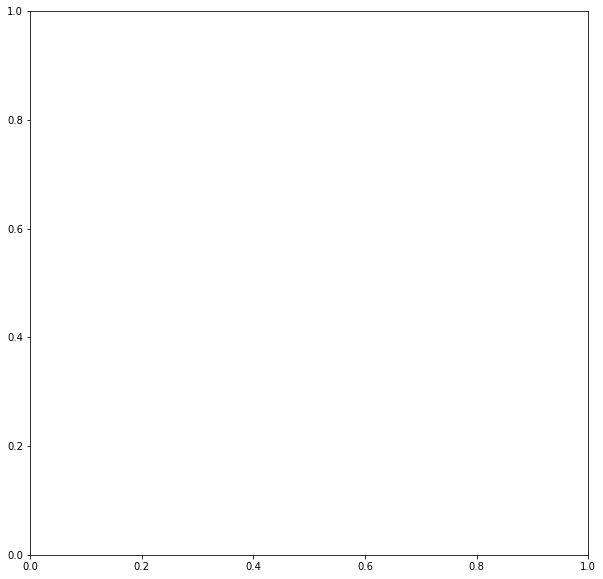

In [47]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
scaled_data = StandardScaler().fit_transform(X)
pca.fit(scaled_data)
X_emb = pca.transform(scaled_data)


plt.figure(figsize=(10,10))
plt.scatter(X_emb[:,0],X_emb[:,1],c= Y,cmap='plasma')
plt.xlabel('pc1')
plt.ylabel('pc2')


# UMAP

<AxesSubplot:>

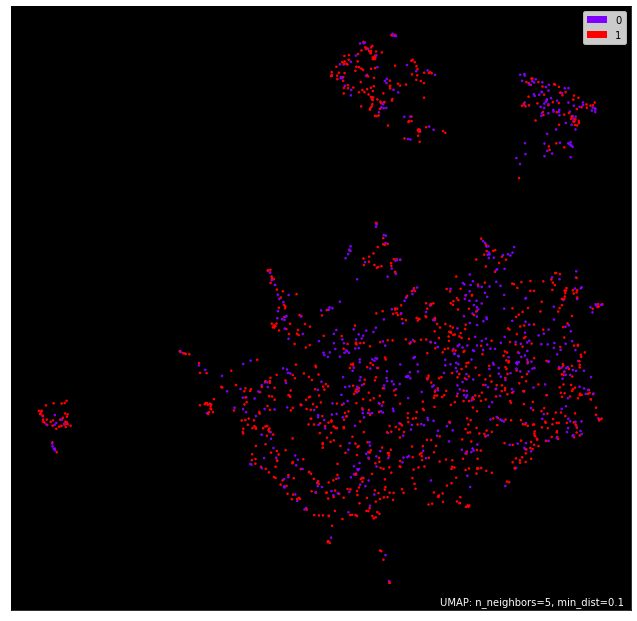

In [54]:
import umap
import umap.plot
reducer = umap.UMAP()

scaled_data = StandardScaler().fit_transform(result)

mapper = umap.UMAP(n_neighbors=5,n_components = 2).fit(scaled_data)

umap.plot.points(mapper,labels = np.array(label)  ,theme='fire')

In [33]:
#As we can see that class separability is very less and data suffers a lot from class imbalance so ensemble methods will be a 
#better suit for the data

In [34]:
sc1 = StandardScaler()
sc2 =  StandardScaler()
sc3 =  StandardScaler()

cats_features = ['C1','C2', 'C3', 'C4', 'C5', 'C6', 'C7','C8','N2','N4','N5','N7','N8','N10','N10.1',
        'N11','N14','N15','N16','N20','N22','N35']

cats_features = [e for e in X.columns if e not in cats_features] 

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size = 0.2)

Xtrainscaled = Xtrain.copy()
Xtestscaled = Xtest.copy()

Xtrainstart = Xtrain.copy()
Xteststart = Xtest.copy()

Xtrainall  = Xtrain.copy()
Xtestall = Xtest.copy()
#scaling all features containing integer values
Xtrainscaled[cats_features] = sc1.fit_transform(Xtrainscaled[cats_features])
Xtestscaled[cats_features] = sc1.fit_transform(Xtestscaled[cats_features])

cats_features = X.columns[8:]
#scaling all features except c1 to c8
Xtrainstart[cats_features] = sc2.fit_transform(Xtrainstart[cats_features])
Xteststart[cats_features] = sc2.fit_transform(Xteststart[cats_features])

#scaling all features including categorical features
Xtrainall = sc3.fit_transform(Xtrainall)
Xtestall = sc3.fit_transform(Xtestall)

In [102]:
import featuretools as ft

In [103]:
Xn['uid'] = Xn['Unique_ID'] + Xn['N12'].astype('str')

In [104]:
Xn

,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N10.1,N11,N12,N14,N15,N16,N17,N18,N19,N20,N21,N22,N23,N24,N33,N34,N35,C1,C2,C3,C4,C5,C6,C7,C8,Unique_ID,uid
1,11.05,22.0,3.7,16.0,12.0,3.795,19.0,4,72,0.0,5.0,9.0,0.0,0.0,0.0,0.0,1944.0,0.06,25856.0,17.0,0.88,1.0,40.0,10833.333330,160.00,262.10,17.0,1,4,2,66,2,0,1,1,Candidate_48134,Candidate_481340.0
3,17.99,1.0,3.5,4.0,4.0,3.595,6.0,5,190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8244.0,0.89,1006.0,6.0,1.00,0.0,26.0,2413.666667,70.00,126.52,27.0,1,1,16,47,1,0,4,1,Candidate_26401,Candidate_264010.0
4,27.50,206.0,3.8,11.0,11.0,3.895,31.0,10,1504,0.0,1.0,4.0,0.0,0.0,0.0,0.0,57532.0,0.97,3398.0,31.0,0.96,0.0,44.0,7666.666667,100.00,205.47,21.0,1,1,13,1,1,1,6,1,Candidate_34872,Candidate_348720.0
5,13.50,14.0,3.3,11.0,11.0,3.395,11.0,8,337,0.0,1.0,4.0,0.0,0.0,0.0,0.0,6990.0,0.62,4110.0,11.0,0.90,2.0,48.0,4250.000000,150.00,254.51,13.0,1,0,30,13,2,0,2,1,Candidate_29660,Candidate_296600.0
6,8.50,27.0,3.6,13.0,13.0,3.695,25.0,10,443,0.0,3.0,9.0,0.0,0.0,0.0,0.0,55008.0,0.58,38757.0,23.0,1.00,2.0,30.0,4875.000000,51.00,80.50,19.0,1,0,41,0,2,1,2,1,Candidate_29517,Candidate_295170.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33044,8.20,32.0,4.0,7.0,7.0,4.095,18.0,6,151,0.0,4.0,7.0,0.0,0.0,0.0,0.0,2527.0,0.11,20232.0,17.0,1.00,0.0,12.0,8166.666667,72.00,313.49,15.0,3,1,19,0,1,1,6,1,Candidate_18018,Candidate_180180.0
33045,15.50,19.0,3.1,7.0,6.0,3.195,7.0,6,303,0.0,0.0,8.0,0.0,0.0,0.0,0.0,16762.0,0.68,7661.0,7.0,1.00,0.0,18.0,7000.000000,199.98,349.07,8.0,1,1,14,41,2,0,6,1,Candidate_26099,Candidate_260990.0
33046,32.20,42.0,3.1,12.0,11.0,3.195,50.0,7,225,2.0,1.0,8.0,2135.0,33.0,1.0,0.0,6551.0,0.86,868.0,41.0,0.63,2.0,42.0,4420.000000,40.00,87.33,19.0,1,6,10,1,2,1,2,1,Candidate_33316,Candidate_333162135.0
33047,8.99,137.0,3.7,14.0,14.0,3.795,30.0,13,297,0.0,1.0,1.0,31.0,2.0,0.0,0.0,7809.0,0.27,20105.0,28.0,0.75,0.0,18.0,6971.833333,40.00,63.59,20.0,1,1,2,4,2,0,6,1,Candidate_36027,Candidate_3602731.0


In [105]:
ft.list_primitives()

,name,type,dask_compatible,koalas_compatible,description,valid_inputs,return_type
0,percent_true,aggregation,True,False,Determines the percent of `True` values.,Boolean,Numeric
1,first,aggregation,False,False,Determines the first value in a list.,Variable,None
2,trend,aggregation,False,False,Calculates the trend of a variable over time.,"DatetimeTimeIndex, Numeric",Numeric
3,mean,aggregation,True,True,Computes the average for a list of values.,Numeric,Numeric
4,mode,aggregation,False,False,Determines the most commonly repeated value.,Discrete,None
...,...,...,...,...,...,...,...
79,negate,transform,True,True,Negates a numeric value.,Numeric,Numeric
80,scalar_subtract_numeric_feature,transform,True,True,Subtract each value in the list from a given s...,Numeric,Numeric
81,equal,transform,True,True,Determines if values in one list are equal to ...,Variable,Boolean
82,is_free_email_domain,transform,False,False,Determines if an email address is from a free ...,EmailAddress,Boolean


In [106]:
# initialize entityset
es = ft.EntitySet(id = 'dataset')
variable_types = {cat:ft.variable_types.Categorical for cat in cats}

es.entity_from_dataframe(entity_id = 'id', dataframe = Xn,  index = 'Unique_ID')


Entityset: dataset
  Entities:
    id [Rows: 28426, Columns: 37]
  Relationships:
    No relationships

In [107]:
es['id']

Entity: id
  Variables:
    Unique_ID (dtype: index)
    N1 (dtype: numeric)
    N2 (dtype: numeric)
    N3 (dtype: numeric)
    N4 (dtype: numeric)
    N5 (dtype: numeric)
    N6 (dtype: numeric)
    N7 (dtype: numeric)
    N8 (dtype: numeric)
    N9 (dtype: numeric)
    N10 (dtype: numeric)
    N10.1 (dtype: numeric)
    N11 (dtype: numeric)
    N12 (dtype: numeric)
    N14 (dtype: numeric)
    N15 (dtype: numeric)
    N16 (dtype: numeric)
    N17 (dtype: numeric)
    N18 (dtype: numeric)
    N19 (dtype: numeric)
    N20 (dtype: numeric)
    N21 (dtype: numeric)
    N22 (dtype: numeric)
    N23 (dtype: numeric)
    N24 (dtype: numeric)
    N33 (dtype: numeric)
    N34 (dtype: numeric)
    N35 (dtype: numeric)
    C1 (dtype: categorical)
    C2 (dtype: categorical)
    C3 (dtype: categorical)
    C4 (dtype: categorical)
    C5 (dtype: categorical)
    C6 (dtype: categorical)
    C7 (dtype: categorical)
    C8 (dtype: categorical)
    uid (dtype: categorical)
  Shape:
    (Rows: 28426,

In [108]:
es.normalize_entity(base_entity_id='id', new_entity_id='Xnew', index = 'uid' )

Entityset: dataset
  Entities:
    id [Rows: 28426, Columns: 37]
    Xnew [Rows: 28417, Columns: 1]
  Relationships:
    id.uid -> Xnew.uid

In [116]:
feature_matrix, feature_names = ft.dfs(entityset=es, target_entity = 'id', max_depth = 2, verbose = 1)

Built 215 features
Elapsed: 01:34 | Progress: 100%|███████████████████████████████████████████████████████████████████████████████████████


In [149]:
feature_matrix = pd.merge(feature_matrix,Xbin,on='Unique_ID')

In [150]:
null = feature_matrix.isna().sum()
nun = feature_matrix.nunique()
for i in feature_matrix.columns:
    if null[i] != 0 or nun[i] == 0:
        feature_matrix.drop([i],axis = 1,inplace = True)
        

In [153]:
feature_matrix.drop(['uid','Unique_ID'],axis = 1,inplace = True)

In [154]:
feature_matrix

,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N10.1,N11,N12,N14,N15,N16,N17,N18,N19,N20,N21,N22,N23,N24,N33,N34,N35,C1,C2,C3,C4,C5,C6,C7,C8,Xnew.COUNT(id),Xnew.MAX(id.N1),Xnew.MAX(id.N10),Xnew.MAX(id.N10.1),Xnew.MAX(id.N11),Xnew.MAX(id.N12),Xnew.MAX(id.N14),Xnew.MAX(id.N15),Xnew.MAX(id.N16),Xnew.MAX(id.N17),Xnew.MAX(id.N18),Xnew.MAX(id.N19),Xnew.MAX(id.N2),Xnew.MAX(id.N20),Xnew.MAX(id.N21),Xnew.MAX(id.N22),Xnew.MAX(id.N23),Xnew.MAX(id.N24),Xnew.MAX(id.N3),Xnew.MAX(id.N33),Xnew.MAX(id.N34),Xnew.MAX(id.N35),Xnew.MAX(id.N4),Xnew.MAX(id.N5),Xnew.MAX(id.N6),Xnew.MAX(id.N7),Xnew.MAX(id.N8),Xnew.MAX(id.N9),Xnew.MEAN(id.N1),Xnew.MEAN(id.N10),Xnew.MEAN(id.N10.1),Xnew.MEAN(id.N11),Xnew.MEAN(id.N12),Xnew.MEAN(id.N14),Xnew.MEAN(id.N15),Xnew.MEAN(id.N16),Xnew.MEAN(id.N17),Xnew.MEAN(id.N18),Xnew.MEAN(id.N19),Xnew.MEAN(id.N2),Xnew.MEAN(id.N20),Xnew.MEAN(id.N21),Xnew.MEAN(id.N22),Xnew.MEAN(id.N23),Xnew.MEAN(id.N24),Xnew.MEAN(id.N3),Xnew.MEAN(id.N33),Xnew.MEAN(id.N34),Xnew.MEAN(id.N35),Xnew.MEAN(id.N4),Xnew.MEAN(id.N5),Xnew.MEAN(id.N6),Xnew.MEAN(id.N7),Xnew.MEAN(id.N8),Xnew.MEAN(id.N9),Xnew.MIN(id.N1),Xnew.MIN(id.N10),Xnew.MIN(id.N10.1),Xnew.MIN(id.N11),Xnew.MIN(id.N12),Xnew.MIN(id.N14),Xnew.MIN(id.N15),Xnew.MIN(id.N16),Xnew.MIN(id.N17),Xnew.MIN(id.N18),Xnew.MIN(id.N19),Xnew.MIN(id.N2),Xnew.MIN(id.N20),Xnew.MIN(id.N21),Xnew.MIN(id.N22),Xnew.MIN(id.N23),Xnew.MIN(id.N24),Xnew.MIN(id.N3),Xnew.MIN(id.N33),Xnew.MIN(id.N34),Xnew.MIN(id.N35),Xnew.MIN(id.N4),Xnew.MIN(id.N5),Xnew.MIN(id.N6),Xnew.MIN(id.N7),Xnew.MIN(id.N8),Xnew.MIN(id.N9),Xnew.MODE(id.C1),Xnew.MODE(id.C2),Xnew.MODE(id.C3),Xnew.MODE(id.C4),Xnew.MODE(id.C5),Xnew.MODE(id.C6),Xnew.MODE(id.C7),Xnew.MODE(id.C8),Xnew.NUM_UNIQUE(id.C1),Xnew.NUM_UNIQUE(id.C2),Xnew.NUM_UNIQUE(id.C3),Xnew.NUM_UNIQUE(id.C4),Xnew.NUM_UNIQUE(id.C5),Xnew.NUM_UNIQUE(id.C6),Xnew.NUM_UNIQUE(id.C7),Xnew.NUM_UNIQUE(id.C8),Xnew.SUM(id.N1),Xnew.SUM(id.N10),Xnew.SUM(id.N10.1),Xnew.SUM(id.N11),Xnew.SUM(id.N12),Xnew.SUM(id.N14),Xnew.SUM(id.N15),Xnew.SUM(id.N16),Xnew.SUM(id.N17),Xnew.SUM(id.N18),Xnew.SUM(id.N19),Xnew.SUM(id.N2),Xnew.SUM(id.N20),Xnew.SUM(id.N21),Xnew.SUM(id.N22),Xnew.SUM(id.N23),Xnew.SUM(id.N24),Xnew.SUM(id.N3),Xnew.SUM(id.N33),Xnew.SUM(id.N34),Xnew.SUM(id.N35),Xnew.SUM(id.N4),Xnew.SUM(id.N5),Xnew.SUM(id.N6),Xnew.SUM(id.N7),Xnew.SUM(id.N8),Xnew.SUM(id.N9),binN1,binN2,binN3,binN4,binN5,binN6,binN7,binN8,binN9,binN10,binN10.1,binN11,binN12,binN14,binN15,binN16,binN17,binN18,binN19,binN20,binN21,binN22,binN23,binN24,binN33,binN34,binN35
0,11.05,22.0,3.7,16.0,12.0,3.795,19.0,4,72,0.0,5.0,9.0,0.0,0.0,0.0,0.0,1944.0,0.06,25856.0,17.0,0.88,1.0,40.0,10833.333330,160.00,262.10,17.0,1,4,2,66,2,0,1,1,1,11.05,0.0,5.0,9.0,0.0,0.0,0.0,0.0,1944.0,0.06,25856.0,22.0,17.0,0.88,1.0,40.0,10833.333330,3.7,160.00,262.10,17.0,16.0,12.0,3.795,19.0,4,72,11.05,0.0,5.0,9.0,0.0,0.0,0.0,0.0,1944.0,0.06,25856.0,22.0,17.0,0.88,1.0,40.0,10833.333330,3.7,160.00,262.10,17.0,16.0,12.0,3.795,19.0,4.0,72.0,11.05,0.0,5.0,9.0,0.0,0.0,0.0,0.0,1944.0,0.06,25856.0,22.0,17.0,0.88,1.0,40.0,10833.333330,3.7,160.00,262.10,17.0,16.0,12.0,3.795,19.0,4,72,1,4,2,66,2,0,1,1,1,1,1,1,1,1,1,1,11.05,0.0,5.0,9.0,0.0,0.0,0.0,0.0,1944.0,0.06,25856.0,22.0,17.0,0.88,1.0,40.0,10833.333330,3.7,160.00,262.10,17.0,16.0,12.0,3.795,19.0,4,72,1,0,3,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,1,0,1
1,17.99,1.0,3.5,4.0,4.0,3.595,6.0,5,190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8244.0,0.89,1006.0,6.0,1.00,0.0,26.0,2413.666667,70.00,126.52,27.0,1,1,16,47,1,0,4,1,1,17.99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8244.0,0.89,1006.0,1.0,6.0,1.00,0.0,26.0,2413.666667,3.5,70.00,126.52,27.0,4.0,4.0,3.595,6.0,5,190,17.99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8244.0,0.89,1006.0,1.0,6.0,1.00,0.0,26.0,2413.666667,3.5,70.00,126.52,27.0,4.0,4.0,3.595,6.0,5.0,190.0,17.99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8244.0,0.89,1006.0,1.0,6.0,1.00,0.0,26.0,2413.666667,3.5,70.00,126.52,27.0,4.0,4.0,3.595,6.0,5,190,1,1,16,47,1,0,4,1,1,1,1,1,1,1,1,1,17.99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8244.0,0.89,1006.0,1.0,6.0,1.00,0.0,26.0,2413.666667,3.5,70.00,126.52,27.0,4.0,4.0,3

In [155]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(feature_matrix,Y,test_size = 0.2,random_state = 42)

In [226]:
Xtrain

,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N10.1,N11,N12,N14,N15,N16,N17,N18,N19,N20,N21,N22,N23,N24,N33,N34,N35,C1,C2,C3,C4,C5,C6,C7,C8,Xnew.COUNT(id),Xnew.MAX(id.N1),Xnew.MAX(id.N10),Xnew.MAX(id.N10.1),Xnew.MAX(id.N11),Xnew.MAX(id.N12),Xnew.MAX(id.N14),Xnew.MAX(id.N15),Xnew.MAX(id.N16),Xnew.MAX(id.N17),Xnew.MAX(id.N18),Xnew.MAX(id.N19),Xnew.MAX(id.N2),Xnew.MAX(id.N20),Xnew.MAX(id.N21),Xnew.MAX(id.N22),Xnew.MAX(id.N23),Xnew.MAX(id.N24),Xnew.MAX(id.N3),Xnew.MAX(id.N33),Xnew.MAX(id.N34),Xnew.MAX(id.N35),Xnew.MAX(id.N4),Xnew.MAX(id.N5),Xnew.MAX(id.N6),Xnew.MAX(id.N7),Xnew.MAX(id.N8),Xnew.MAX(id.N9),Xnew.MEAN(id.N1),Xnew.MEAN(id.N10),Xnew.MEAN(id.N10.1),Xnew.MEAN(id.N11),Xnew.MEAN(id.N12),Xnew.MEAN(id.N14),Xnew.MEAN(id.N15),Xnew.MEAN(id.N16),Xnew.MEAN(id.N17),Xnew.MEAN(id.N18),Xnew.MEAN(id.N19),Xnew.MEAN(id.N2),Xnew.MEAN(id.N20),Xnew.MEAN(id.N21),Xnew.MEAN(id.N22),Xnew.MEAN(id.N23),Xnew.MEAN(id.N24),Xnew.MEAN(id.N3),Xnew.MEAN(id.N33),Xnew.MEAN(id.N34),Xnew.MEAN(id.N35),Xnew.MEAN(id.N4),Xnew.MEAN(id.N5),Xnew.MEAN(id.N6),Xnew.MEAN(id.N7),Xnew.MEAN(id.N8),Xnew.MEAN(id.N9),Xnew.MIN(id.N1),Xnew.MIN(id.N10),Xnew.MIN(id.N10.1),Xnew.MIN(id.N11),Xnew.MIN(id.N12),Xnew.MIN(id.N14),Xnew.MIN(id.N15),Xnew.MIN(id.N16),Xnew.MIN(id.N17),Xnew.MIN(id.N18),Xnew.MIN(id.N19),Xnew.MIN(id.N2),Xnew.MIN(id.N20),Xnew.MIN(id.N21),Xnew.MIN(id.N22),Xnew.MIN(id.N23),Xnew.MIN(id.N24),Xnew.MIN(id.N3),Xnew.MIN(id.N33),Xnew.MIN(id.N34),Xnew.MIN(id.N35),Xnew.MIN(id.N4),Xnew.MIN(id.N5),Xnew.MIN(id.N6),Xnew.MIN(id.N7),Xnew.MIN(id.N8),Xnew.MIN(id.N9),Xnew.MODE(id.C1),Xnew.MODE(id.C2),Xnew.MODE(id.C3),Xnew.MODE(id.C4),Xnew.MODE(id.C5),Xnew.MODE(id.C6),Xnew.MODE(id.C7),Xnew.MODE(id.C8),Xnew.NUM_UNIQUE(id.C1),Xnew.NUM_UNIQUE(id.C2),Xnew.NUM_UNIQUE(id.C3),Xnew.NUM_UNIQUE(id.C4),Xnew.NUM_UNIQUE(id.C5),Xnew.NUM_UNIQUE(id.C6),Xnew.NUM_UNIQUE(id.C7),Xnew.NUM_UNIQUE(id.C8),Xnew.SUM(id.N1),Xnew.SUM(id.N10),Xnew.SUM(id.N10.1),Xnew.SUM(id.N11),Xnew.SUM(id.N12),Xnew.SUM(id.N14),Xnew.SUM(id.N15),Xnew.SUM(id.N16),Xnew.SUM(id.N17),Xnew.SUM(id.N18),Xnew.SUM(id.N19),Xnew.SUM(id.N2),Xnew.SUM(id.N20),Xnew.SUM(id.N21),Xnew.SUM(id.N22),Xnew.SUM(id.N23),Xnew.SUM(id.N24),Xnew.SUM(id.N3),Xnew.SUM(id.N33),Xnew.SUM(id.N34),Xnew.SUM(id.N35),Xnew.SUM(id.N4),Xnew.SUM(id.N5),Xnew.SUM(id.N6),Xnew.SUM(id.N7),Xnew.SUM(id.N8),Xnew.SUM(id.N9),binN1,binN2,binN3,binN4,binN5,binN6,binN7,binN8,binN9,binN10,binN10.1,binN11,binN12,binN14,binN15,binN16,binN17,binN18,binN19,binN20,binN21,binN22,binN23,binN24,binN33,binN34,binN35
5070,6.95,211.0,4.3,11.0,8.0,4.395,29.0,6,15,0.0,1.0,7.0,0.0,0.0,0.0,0.0,1543.0,0.01,119617.0,27.0,1.00,1.0,10.0,1258.000000,30.0,46.28,29.0,1,4,11,1,7,1,7,1,1,6.95,0.0,1.0,7.0,0.0,0.0,0.0,0.0,1543.0,0.01,119617.0,211.0,27.0,1.00,1.0,10.0,1258.000000,4.3,30.0,46.28,29.0,11.0,8.0,4.395,29.0,6,15,6.95,0.0,1.0,7.0,0.0,0.0,0.0,0.0,1543.0,0.01,119617.0,211.0,27.0,1.00,1.0,10.0,1258.000000,4.3,30.0,46.28,29.0,11.0,8.0,4.395,29.0,6.0,15.0,6.95,0.0,1.0,7.0,0.0,0.0,0.0,0.0,1543.0,0.01,119617.0,211.0,27.0,1.00,1.0,10.0,1258.000000,4.3,30.0,46.28,29.0,11.0,8.0,4.395,29.0,6,15,1,4,11,1,7,1,7,1,1,1,1,1,1,1,1,1,6.95,0.0,1.0,7.0,0.0,0.0,0.0,0.0,1543.0,0.01,119617.0,211.0,27.0,1.00,1.0,10.0,1258.000000,4.3,30.0,46.28,29.0,11.0,8.0,4.395,29.0,6,15,0,1,4,0,0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,1,4,0,0,0,0,0,2
27666,26.99,8.0,3.2,4.0,4.0,3.295,30.0,2,135,1.0,2.0,3.0,91.0,0.0,1.0,0.0,5648.0,0.92,304.0,19.0,0.85,2.0,30.0,6458.333333,70.0,142.87,11.0,1,6,4,13,1,1,6,1,1,26.99,1.0,2.0,3.0,91.0,0.0,1.0,0.0,5648.0,0.92,304.0,8.0,19.0,0.85,2.0,30.0,6458.333333,3.2,70.0,142.87,11.0,4.0,4.0,3.295,30.0,2,135,26.99,1.0,2.0,3.0,91.0,0.0,1.0,0.0,5648.0,0.92,304.0,8.0,19.0,0.85,2.0,30.0,6458.333333,3.2,70.0,142.87,11.0,4.0,4.0,3.295,30.0,2.0,135.0,26.99,1.0,2.0,3.0,91.0,0.0,1.0,0.0,5648.0,0.92,304.0,8.0,19.0,0.85,2.0,30.0,6458.333333,3.2,70.0,142.87,11.0,4.0,4.0,3.295,30.0,2,135,1,6,4,13,1,1,6,1,1,1,1,1,1,1,1,1,26.99,1.0,2.0,3.0,91.0,0.0,1.0,0.0,5648.0,0.92,304.0,8.0,19.0,0.85,2.0,30.0,6458.333333,3.2,70.0,142.87,11.0,4.0,4.0,3.295,30.0,2

# Logistic Regression

In [48]:
#Training a Logistic Regression model for baseline

In [49]:
#One hot encoding c1 as all other features contain large number of categories.

one_hot = pd.get_dummies(Xtrainscaled['C1'],drop_first = True)
Xtraincoded = Xtrain.drop(['C1'],axis = 1)
Xtraincoded = pd.concat([Xtraincoded,one_hot],axis = 1)

one_hot = pd.get_dummies(Xtestscaled['C1'],drop_first = True)
Xtestcoded = Xtest.drop(['C1'],axis = 1)
Xtestcoded = pd.concat([Xtestcoded,one_hot],axis = 1)

roc_auc_score 0.7335975486854531
auc 0.7335975486854531


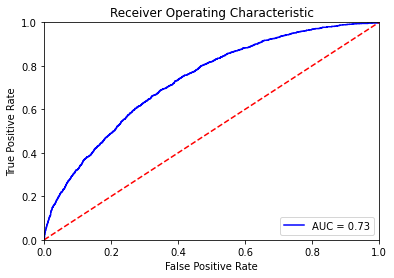

In [50]:
from sklearn.linear_model import LogisticRegression


logmodel = LogisticRegression(max_iter = 50000, C = 0.001,class_weight = 'balanced')

logmodel.fit(Xtrain,Ytrain)
predprob = logmodel.predict_proba(Xtest)[:,1]


print('roc_auc_score',roc_auc_score(Ytest,predprob))
false_positive_rate, true_positive_rate, thresholds = roc_curve(Ytest, predprob)
print('auc',auc(false_positive_rate, true_positive_rate))

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label = 'AUC = %0.2f' % auc(false_positive_rate, true_positive_rate))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [51]:
#Now training random forest classifier 

# Random Forest 

roc_auc_score 0.7404981947931382
auc 0.7404981947931382


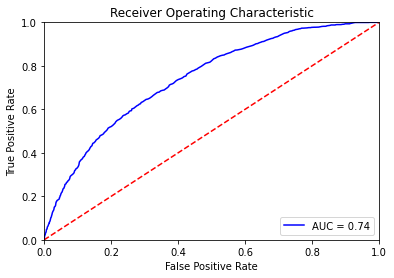

In [125]:
from sklearn.ensemble import RandomForestClassifier


ranmodel = RandomForestClassifier(n_estimators = 500,criterion = 'entropy')
ranmodel.fit(Xtrain,Ytrain)

predprob = ranmodel.predict_proba(Xtest)[:,1]


print('roc_auc_score',roc_auc_score(Ytest,predprob))
false_positive_rate, true_positive_rate, thresholds = roc_curve(Ytest, predprob)
print('auc',auc(false_positive_rate, true_positive_rate))

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label = 'AUC = %0.2f' % auc(false_positive_rate, true_positive_rate))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

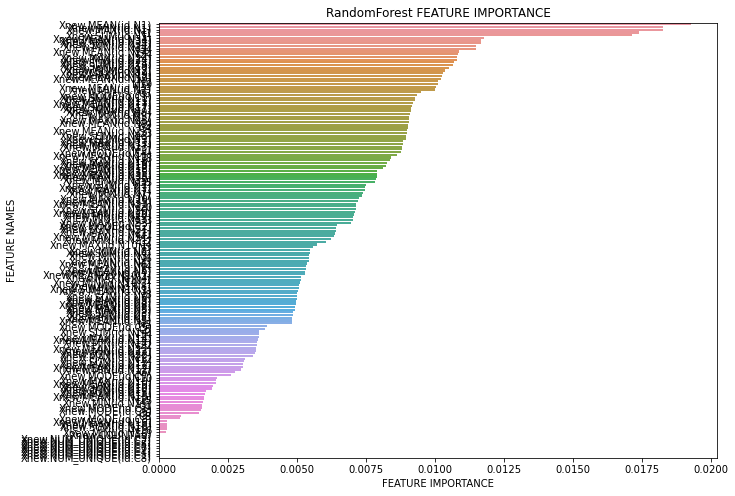

In [126]:
#Plotting feature importance of RandomForestClassifier

def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
plot_feature_importance(ranmodel.feature_importances_,Xtrain.columns,'RandomForest')

In [54]:
#As data have many categorical features, catboost may give a good result on it

In [71]:
Xtrain

,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N10.1,N11,N12,N14,N15,N16,N17,N18,N19,N20,N21,N22,N23,N24,N33,N34,N35,C1,C2,C3,C4,C5,C6,C7,C8,Xnew.COUNT(id),Xnew.MAX(id.N1),Xnew.MAX(id.N10),Xnew.MAX(id.N10.1),Xnew.MAX(id.N11),Xnew.MAX(id.N12),Xnew.MAX(id.N14),Xnew.MAX(id.N15),Xnew.MAX(id.N16),Xnew.MAX(id.N17),Xnew.MAX(id.N18),Xnew.MAX(id.N19),Xnew.MAX(id.N2),Xnew.MAX(id.N20),Xnew.MAX(id.N21),Xnew.MAX(id.N22),Xnew.MAX(id.N23),Xnew.MAX(id.N24),Xnew.MAX(id.N3),Xnew.MAX(id.N33),Xnew.MAX(id.N34),Xnew.MAX(id.N35),Xnew.MAX(id.N4),Xnew.MAX(id.N5),Xnew.MAX(id.N6),Xnew.MAX(id.N7),Xnew.MAX(id.N8),Xnew.MAX(id.N9),Xnew.MEAN(id.N1),Xnew.MEAN(id.N10),Xnew.MEAN(id.N10.1),Xnew.MEAN(id.N11),Xnew.MEAN(id.N12),Xnew.MEAN(id.N14),Xnew.MEAN(id.N15),Xnew.MEAN(id.N16),Xnew.MEAN(id.N17),Xnew.MEAN(id.N18),Xnew.MEAN(id.N19),Xnew.MEAN(id.N2),Xnew.MEAN(id.N20),Xnew.MEAN(id.N21),Xnew.MEAN(id.N22),Xnew.MEAN(id.N23),Xnew.MEAN(id.N24),Xnew.MEAN(id.N3),Xnew.MEAN(id.N33),Xnew.MEAN(id.N34),Xnew.MEAN(id.N35),Xnew.MEAN(id.N4),Xnew.MEAN(id.N5),Xnew.MEAN(id.N6),Xnew.MEAN(id.N7),Xnew.MEAN(id.N8),Xnew.MEAN(id.N9),Xnew.MIN(id.N1),Xnew.MIN(id.N10),Xnew.MIN(id.N10.1),Xnew.MIN(id.N11),Xnew.MIN(id.N12),Xnew.MIN(id.N14),Xnew.MIN(id.N15),Xnew.MIN(id.N16),Xnew.MIN(id.N17),Xnew.MIN(id.N18),Xnew.MIN(id.N19),Xnew.MIN(id.N2),Xnew.MIN(id.N20),Xnew.MIN(id.N21),Xnew.MIN(id.N22),Xnew.MIN(id.N23),Xnew.MIN(id.N24),Xnew.MIN(id.N3),Xnew.MIN(id.N33),Xnew.MIN(id.N34),Xnew.MIN(id.N35),Xnew.MIN(id.N4),Xnew.MIN(id.N5),Xnew.MIN(id.N6),Xnew.MIN(id.N7),Xnew.MIN(id.N8),Xnew.MIN(id.N9),Xnew.MODE(id.C1),Xnew.MODE(id.C2),Xnew.MODE(id.C3),Xnew.MODE(id.C4),Xnew.MODE(id.C5),Xnew.MODE(id.C6),Xnew.MODE(id.C7),Xnew.MODE(id.C8),Xnew.NUM_UNIQUE(id.C1),Xnew.NUM_UNIQUE(id.C2),Xnew.NUM_UNIQUE(id.C3),Xnew.NUM_UNIQUE(id.C4),Xnew.NUM_UNIQUE(id.C5),Xnew.NUM_UNIQUE(id.C6),Xnew.NUM_UNIQUE(id.C7),Xnew.NUM_UNIQUE(id.C8),Xnew.SUM(id.N1),Xnew.SUM(id.N10),Xnew.SUM(id.N10.1),Xnew.SUM(id.N11),Xnew.SUM(id.N12),Xnew.SUM(id.N14),Xnew.SUM(id.N15),Xnew.SUM(id.N16),Xnew.SUM(id.N17),Xnew.SUM(id.N18),Xnew.SUM(id.N19),Xnew.SUM(id.N2),Xnew.SUM(id.N20),Xnew.SUM(id.N21),Xnew.SUM(id.N22),Xnew.SUM(id.N23),Xnew.SUM(id.N24),Xnew.SUM(id.N3),Xnew.SUM(id.N33),Xnew.SUM(id.N34),Xnew.SUM(id.N35),Xnew.SUM(id.N4),Xnew.SUM(id.N5),Xnew.SUM(id.N6),Xnew.SUM(id.N7),Xnew.SUM(id.N8),Xnew.SUM(id.N9),binN1,binN2,binN3,binN4,binN5,binN6,binN7,binN8,binN9,binN10,binN10.1,binN11,binN12,binN14,binN15,binN16,binN17,binN18,binN19,binN20,binN21,binN22,binN23,binN24,binN33,binN34,binN35
19952,31.99,14.0,3.4,4.0,3.0,3.495,16.0,3,30,0.0,3.0,11.0,0.0,1.0,1.0,0.0,107.0,0.04,2193.0,16.0,0.68,1.0,42.0,3333.333333,40.0,87.10,18.0,1,1,28,15,1,0,4,0,1,31.99,0.0,3.0,11.0,0.0,1.0,1.0,0.0,107.0,0.04,2193.0,14.0,16.0,0.68,1.0,42.0,3333.333333,3.4,40.0,87.10,18.0,4.0,3.0,3.495,16.0,3,30,31.99,0.0,3.0,11.0,0.0,1.0,1.0,0.0,107.0,0.04,2193.0,14.0,16.0,0.68,1.0,42.0,3333.333333,3.4,40.0,87.10,18.0,4.0,3.0,3.495,16.0,3.0,30.0,31.99,0.0,3.0,11.0,0.0,1.0,1.0,0.0,107.0,0.04,2193.0,14.0,16.0,0.68,1.0,42.0,3333.333333,3.4,40.0,87.10,18.0,4.0,3.0,3.495,16.0,3,30,1,1,28,15,1,0,4,0,1,1,1,1,1,1,1,1,31.99,0.0,3.0,11.0,0.0,1.0,1.0,0.0,107.0,0.04,2193.0,14.0,16.0,0.68,1.0,42.0,3333.333333,3.4,40.0,87.10,18.0,4.0,3.0,3.495,16.0,3,30,4,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1
14696,8.00,12.0,3.8,13.0,13.0,3.895,22.0,14,47,0.0,1.0,5.0,0.0,0.0,0.0,0.0,2780.0,0.04,58918.0,21.0,1.00,1.0,12.0,7916.666667,60.6,93.56,16.0,1,0,1,13,2,0,6,1,1,8.00,0.0,1.0,5.0,0.0,0.0,0.0,0.0,2780.0,0.04,58918.0,12.0,21.0,1.00,1.0,12.0,7916.666667,3.8,60.6,93.56,16.0,13.0,13.0,3.895,22.0,14,47,8.00,0.0,1.0,5.0,0.0,0.0,0.0,0.0,2780.0,0.04,58918.0,12.0,21.0,1.00,1.0,12.0,7916.666667,3.8,60.6,93.56,16.0,13.0,13.0,3.895,22.0,14.0,47.0,8.00,0.0,1.0,5.0,0.0,0.0,0.0,0.0,2780.0,0.04,58918.0,12.0,21.0,1.00,1.0,12.0,7916.666667,3.8,60.6,93.56,16.0,13.0,13.0,3.895,22.0,14,47,1,0,1,13,2,0,6,1,1,1,1,1,1,1,1,1,8.00,0.0,1.0,5.0,0.0,0.0,0.0,0.0,2780.0,0.04,58918.0,12.0,21.0,1.00,1.0,12.0,7916.666667,3.8,60.6,93.56,16.0,13.0,13.0,3.895,22.0,14,

# CATBOOST

0:	learn: 0.6619716	total: 78ms	remaining: 23.3s
1:	learn: 0.6389241	total: 158ms	remaining: 23.6s
2:	learn: 0.6201843	total: 222ms	remaining: 22s
3:	learn: 0.6035818	total: 308ms	remaining: 22.8s
4:	learn: 0.5914735	total: 377ms	remaining: 22.2s
5:	learn: 0.5809022	total: 455ms	remaining: 22.3s
6:	learn: 0.5716615	total: 547ms	remaining: 22.9s
7:	learn: 0.5632435	total: 622ms	remaining: 22.7s
8:	learn: 0.5569789	total: 705ms	remaining: 22.8s
9:	learn: 0.5513864	total: 778ms	remaining: 22.6s
10:	learn: 0.5465123	total: 852ms	remaining: 22.4s
11:	learn: 0.5427894	total: 948ms	remaining: 22.8s
12:	learn: 0.5389828	total: 1.03s	remaining: 22.7s
13:	learn: 0.5353277	total: 1.14s	remaining: 23.4s
14:	learn: 0.5327232	total: 1.21s	remaining: 22.9s
15:	learn: 0.5301802	total: 1.29s	remaining: 22.9s
16:	learn: 0.5276080	total: 1.35s	remaining: 22.5s
17:	learn: 0.5250929	total: 1.45s	remaining: 22.7s
18:	learn: 0.5229275	total: 1.52s	remaining: 22.6s
19:	learn: 0.5209439	total: 1.61s	remaining:

162:	learn: 0.4328985	total: 13.3s	remaining: 11.2s
163:	learn: 0.4327000	total: 13.4s	remaining: 11.1s
164:	learn: 0.4324764	total: 13.4s	remaining: 11s
165:	learn: 0.4320170	total: 13.5s	remaining: 10.9s
166:	learn: 0.4315125	total: 13.6s	remaining: 10.8s
167:	learn: 0.4310773	total: 13.7s	remaining: 10.8s
168:	learn: 0.4305877	total: 13.8s	remaining: 10.7s
169:	learn: 0.4298688	total: 13.8s	remaining: 10.6s
170:	learn: 0.4295157	total: 13.9s	remaining: 10.5s
171:	learn: 0.4290887	total: 14s	remaining: 10.4s
172:	learn: 0.4283281	total: 14.1s	remaining: 10.3s
173:	learn: 0.4278820	total: 14.2s	remaining: 10.3s
174:	learn: 0.4274355	total: 14.2s	remaining: 10.2s
175:	learn: 0.4270387	total: 14.3s	remaining: 10.1s
176:	learn: 0.4264772	total: 14.4s	remaining: 10s
177:	learn: 0.4262113	total: 14.5s	remaining: 9.93s
178:	learn: 0.4256393	total: 14.6s	remaining: 9.84s
179:	learn: 0.4251153	total: 14.6s	remaining: 9.75s
180:	learn: 0.4249229	total: 14.7s	remaining: 9.65s
181:	learn: 0.4243

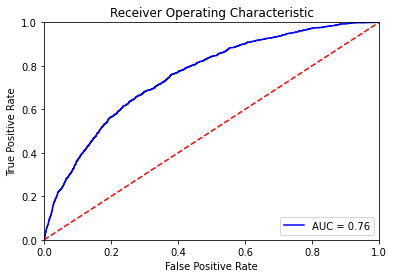

In [108]:
import catboost as cb
from catboost import CatBoostClassifier

#Training CatBoost calssifier
# As catboost takes much time to train and also doesn't need much of hyperparameter turning, we will do it manually


catmodel = CatBoostClassifier(depth=7, iterations=300, l2_leaf_reg=0.3, learning_rate=0.1, loss_function='Logloss',custom_metric = 'AUC')

catmodel.fit(Xtrain,Ytrain, cat_features= cats)

predprob = np.array(catmodel.predict_proba(Xtrain)[:,1])
print('roc_auc_score',roc_auc_score(Ytrain,predprob))
false_positive_rate, true_positive_rate, thresholds = roc_curve(Ytrain, predprob)
print('auc',auc(false_positive_rate, true_positive_rate))

predprob = catmodel.predict_proba(Xtest)[:,1]
print('roc_auc_score',roc_auc_score(Ytest,predprob))
false_positive_rate, true_positive_rate, thresholds = roc_curve(Ytest, predprob)
print('auc',auc(false_positive_rate, true_positive_rate))

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label = 'AUC = %0.2f' % auc(false_positive_rate, true_positive_rate))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [103]:
pred = []
for i in predprob:
    if i > 0.5:
        pred.append(1)
    else:
        pred.append(0)
precision_score(pred,Ytest),recall_score(pred,Ytest),f1_score(pred,Ytest),np.unique(Ytest,return_counts = True),np.unique(pred,return_counts = True)

(0.6346493812610489,
 0.4995361781076067,
 0.5590449000778613,
 (array([0, 1], dtype=int64), array([3989, 1697], dtype=int64)),
 (array([0, 1]), array([3530, 2156], dtype=int64)))

In [107]:
c1 = 0
c0 = 0
Ytest = np.array(Ytest)
Xtes = pd.DataFrame(np.array(Xtest),columns = Xtest.columns)
ind = []
label = []
for i in range(len(pred)):
    if pred[i] != Ytest[i]:
        ind.append(i)
        label.append(pred[i])
        if Ytest[i] == 0:
            c0+=1
        else:
            c1+=1
c0,c1,(c0+c1)/len(pred),np.unique(Ytest,return_counts = True),np.unique(pred,return_counts = True)

(1079,
 620,
 0.298804080196975,
 (array([0, 1], dtype=int64), array([3989, 1697], dtype=int64)),
 (array([0, 1]), array([3530, 2156], dtype=int64)))

In [100]:
result = Xtes.iloc[ind]
catmodel.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'Logloss',
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'],
 'iterations': 500,
 'sampling_frequency': 'PerTree',
 'fold_permutation_block': 0,
 'leaf_estimation_method': 'Newton',
 'counter_calc_method': 'SkipTest',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'ctr_leaf_count_limit': 18446744073709551615,
 'bayesian_matrix_reg': 0.10000000149011612,
 'one_hot_max_size': 2,
 'l2_leaf_reg': 0.30000001192092896,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': False,
 'max_ctr_complexity': 4,
 'model_size_reg': 0.5,
 'simple_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  

In [83]:
result

,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N10.1,N11,N12,N14,N15,N16,N17,N18,N19,N20,N21,N22,N23,N24,N33,N34,N35,C1,C2,C3,C4,C5,C6,C7,C8
1,-0.747831,-0.004242,0.254996,-1.536236,-1.471245,0.254996,-1.658200,-1.211637,-0.757724,0.169566,0.799175,0.059007,-0.110544,-0.410503,-0.408937,-0.132362,-0.464729,-1.511461,-0.500500,-1.670353,0.825957,-0.738389,-0.110264,-0.170278,0.483196,0.270972,-0.613614,1.0,3.0,22.0,10.0,4.0,0.0,4.0,0.0
2,-0.727301,-0.706814,1.143223,1.687471,0.729608,1.143223,1.981645,-0.316790,-0.616141,-0.312827,1.164641,1.743216,-0.150746,-0.410503,0.915785,-0.132362,-0.338217,-1.311471,1.932558,1.786878,0.420617,0.890279,0.003559,0.174857,3.008687,2.829516,0.190303,1.0,3.0,24.0,1.0,2.0,1.0,6.0,1.0
3,-0.500262,-0.472623,-0.929306,-0.998952,-0.871012,-0.929306,-1.238218,-0.987926,-0.688022,-0.312827,-0.297222,0.901111,-0.150746,-0.410503,-0.408937,-0.132362,-0.439362,0.802704,-0.496783,-1.429151,0.825957,-0.738389,-0.081808,-0.323672,-0.357233,-0.372647,-0.881586,1.0,0.0,3.0,1.0,2.0,1.0,4.0,1.0
5,-0.465240,0.019177,-0.337155,0.254712,-0.070702,-0.337155,0.861693,-0.093078,0.144053,-0.312827,0.433709,1.743216,-0.099863,-0.410503,0.915785,-0.132362,-0.110060,0.059886,-0.397517,-0.062338,-1.374463,0.075945,0.216977,-0.366354,-0.280831,-0.293644,0.458276,1.0,0.0,11.0,27.0,2.0,1.0,4.0,1.0
8,1.404212,0.862263,-0.337155,0.075617,0.129375,-0.337155,1.561663,-0.093078,-0.104263,0.169566,0.433709,0.199358,-0.043047,-0.410503,-0.408937,-0.132362,-0.406244,-1.368611,1.101262,2.028081,-0.332159,0.075945,0.074698,0.008681,-0.471837,-0.308558,-0.345642,1.0,15.0,10.0,4.0,1.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5665,-0.741793,-0.215014,0.254996,-0.282572,-0.070702,0.254996,-1.098224,-0.540502,-0.659705,-0.312827,-0.297222,1.602865,-0.150746,-0.410503,0.915785,-0.132362,-0.435780,1.202683,-0.498370,-1.107548,0.825957,-0.738389,-0.067580,-0.119147,0.005679,-0.049635,-1.149559,1.0,0.0,0.0,1.0,2.0,1.0,2.0,1.0
5671,1.794285,-0.870747,-2.409684,-1.178047,-1.071090,-2.409684,-1.588203,-0.987926,-0.650992,-0.312827,0.433709,-0.081344,-0.150746,-0.410503,-0.408937,-0.132362,-0.411764,1.431242,-0.498189,-1.509552,0.825957,0.075945,-0.110264,-0.599780,-1.044857,-0.995258,-1.551517,1.0,3.0,30.0,14.0,2.0,0.0,7.0,0.0
5676,1.189249,-0.179885,-1.225382,1.150186,0.929686,-1.225382,0.861693,0.130634,-0.337331,1.616744,0.799175,0.339708,0.138381,1.495648,2.240507,-0.132362,-0.370454,0.002746,-0.376758,0.098463,-1.200746,3.333281,-0.138719,0.399681,-0.853851,-0.783320,-0.077669,1.0,1.0,3.0,0.0,2.0,1.0,6.0,1.0
5678,1.310015,-0.378947,-0.633231,1.150186,1.529918,-0.633231,0.021728,1.025481,0.268210,-0.312827,-0.662688,-0.642747,-0.150746,-0.410503,-0.408937,-0.132362,0.145755,0.974124,-0.374310,0.178864,0.825957,-0.738389,1.170243,-0.385029,0.196686,0.486598,-0.747600,1.0,7.0,2.0,17.0,2.0,0.0,4.0,1.0


[1.8022512  0.98153483 0.26985812 0.17194171 0.38193717 0.11414095
 0.43616808 0.25334785 0.80779192 0.33675199 0.47016355 0.49601666
 0.25746426 0.20284709 0.1600524  0.05236448 0.36343792 0.50200033
 1.28907468 0.4118103  0.63169564 0.4671865  1.08418183 0.9792642
 0.89648399 0.98803743 0.74852275 2.32976735 2.8223467  1.52594394
 2.95104385 2.2107087  0.59751617 1.15703231 0.         0.
 1.42009924 0.14653519 0.54369471 0.54224786 0.29746208 0.1345638
 0.13453397 0.06085308 0.47284946 0.21548385 0.6902206  0.44327623
 0.84768502 0.12121724 0.20920983 0.63186621 0.67721293 0.18270638
 1.03358443 1.21860853 0.34499514 0.20524981 0.20854191 0.12332966
 0.25660403 0.18330998 0.66469929 1.49737012 0.1790559  0.59616377
 0.59828741 0.34506906 0.23908028 0.12177964 0.         0.41778701
 0.50559003 0.8125031  0.57975336 0.30254424 0.3899561  0.6041504
 0.28807141 1.11507221 0.34854702 0.54764545 0.80983982 0.29463413
 0.33290515 0.26413545 0.07785118 0.29977753 0.19026053 0.83282731
 2.084

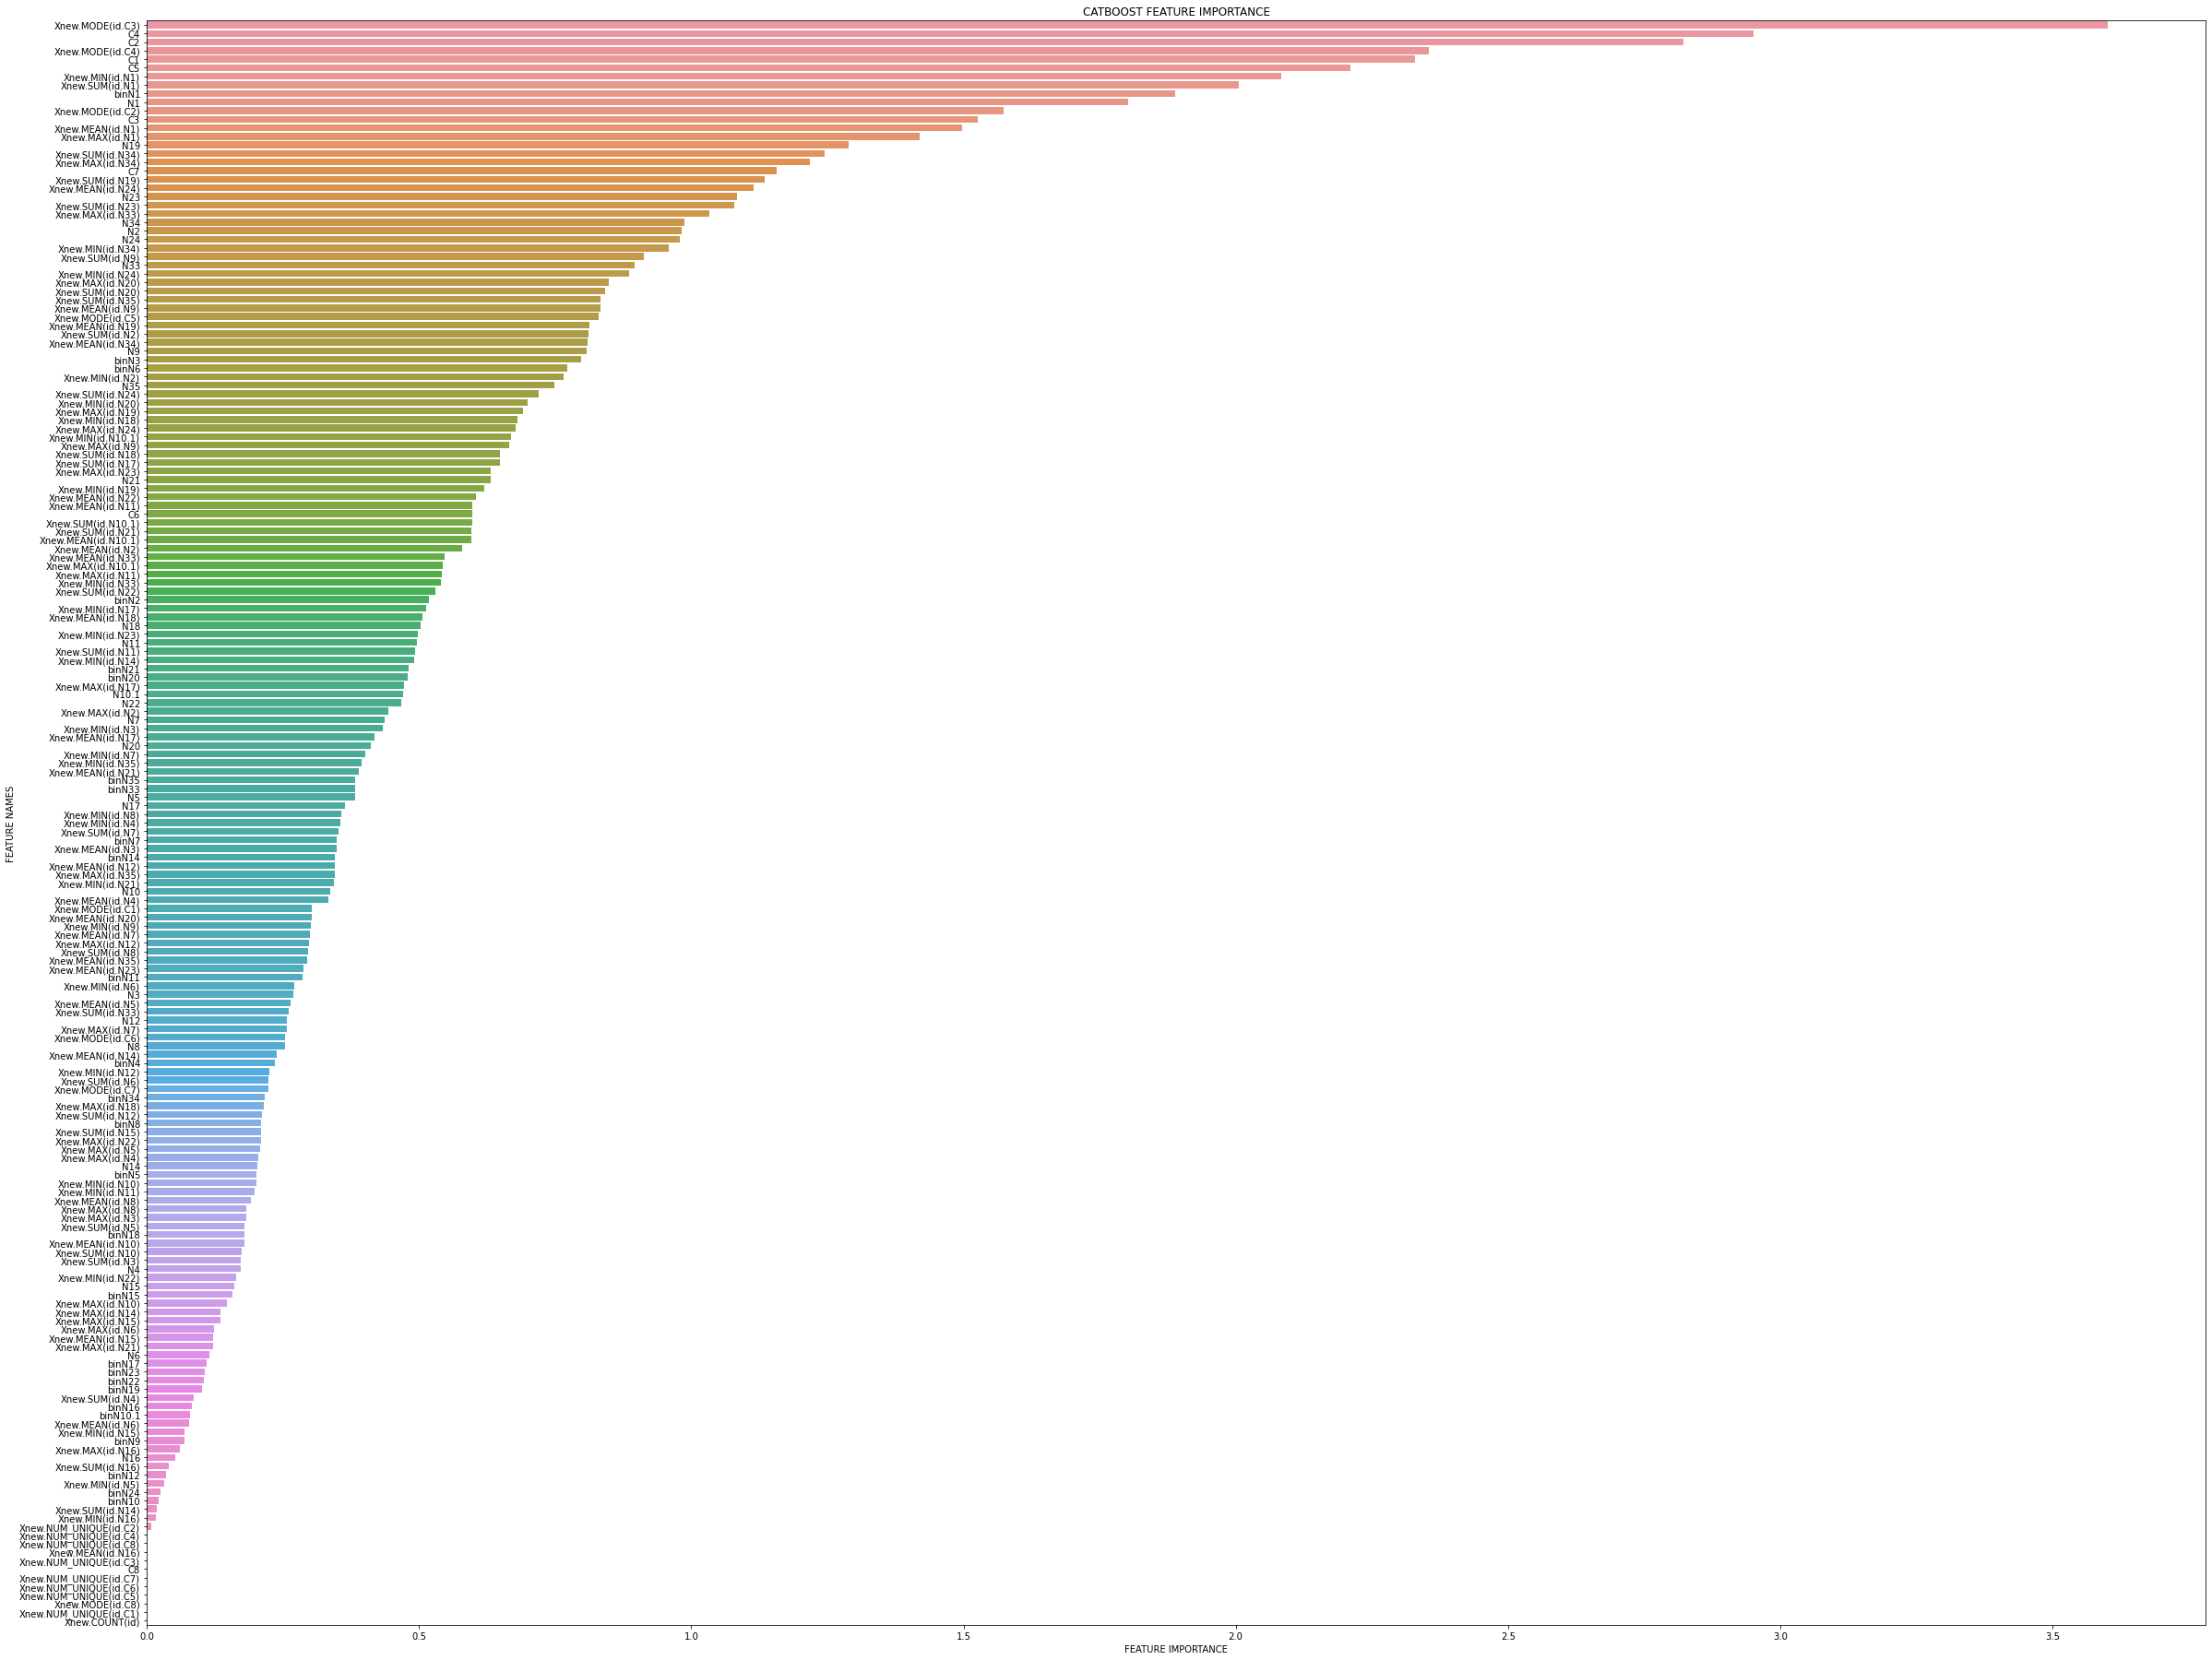

In [225]:
#plotting important features 
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    print(feature_importance)
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(40,32))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
plot_feature_importance(catmodel.get_feature_importance(),Xtrain.columns,'CATBOOST')

In [59]:
#LIGHT GBM can also give good results.

# Light GBM

In [38]:
import lightgbm as lgb

roc_auc_score 0.9992400386656841
auc 0.9992400386656841


C:\Users\Bhagwan\anaconda3\envs\tensorflow-gpu\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Info] Number of positive: 6678, number of negative: 16062
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.024371 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 16824
[LightGBM] [Info] Number of data points in the train set: 22740, number of used features: 178
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.293668 -> initscore=-0.877638
[LightGBM] [Info] Start training from score -0.877638
roc_auc_score 0.7404411187857466
auc 0.7404411187857466


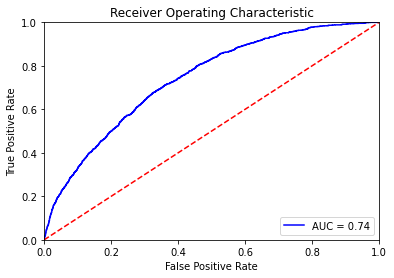

In [163]:
d_train = lgb.Dataset(Xtrain, label=Ytrain)
params = {
    'objective': 'binary',
    'metric': 'auc',
    'num_iterations' : 300,
    'learning_rate' : 0.1,
    'num_leaves' :64,
    'scale_pos_weight' : 2.5,
    'max_depth' : -1
}

model = lgb.train(params, d_train, 400)

predprob = model.predict(Xtrain)
print('roc_auc_score',roc_auc_score(Ytrain,predprob))
false_positive_rate, true_positive_rate, thresholds = roc_curve(Ytrain, predprob)
print('auc',auc(false_positive_rate, true_positive_rate))


predprob=model.predict(Xtest)
print('roc_auc_score',roc_auc_score(Ytest,predprob))
false_positive_rate, true_positive_rate, thresholds = roc_curve(Ytest, predprob)
print('auc',auc(false_positive_rate, true_positive_rate))

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label = 'AUC = %0.2f' % auc(false_positive_rate, true_positive_rate))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [62]:
#test = pd.read_csv('C:\\Users\\Bhagwan\\Downloads\\DS Test\\Test/X_test.csv')

In [63]:
#Dropping columns with excessive number of missing values
#test.drop(['N25','N26','N27','N28','N29','N30','N31','N32',],axis = 1,inplace = True)

In [64]:
#test['C6'] = test['C6'].astype(int)
#test['C8'] = test['C8'].astype(int)

In [65]:
#test1 = test.drop(['Unique_ID'],axis =1)

In [66]:
#predprob = catmodel.predict_proba(test1)

In [67]:
''''c0 = 0
c1 = 0
for i in predprob:
    if i[1] > i[0]:
        c1+=1
    else:
        c0+=1
c0,c1''''

SyntaxError: EOL while scanning string literal (<ipython-input-67-76dfda6f93ef>, line 8)

In [ ]:
#k = pd.DataFrame(predprob[:,1],columns = ['Class_1_Probability'])

In [ ]:
#k = pd.concat([test['Unique_ID'],k],axis = 1)

In [ ]:
#k

In [ ]:
#k.to_csv(path_or_buf= 'C:\\Users\\Bhagwan\\Downloads\\DS Test/output.csv')